# DATA LOADING


We start by loading the data and importing all the necessary libraries for our project. 

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('mldata_0003165871.csv')
df = df.drop([ "Unnamed: 0"], axis=1)
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,1,-17.638279,-17.479427,-10.900275,-13.555493,-11.552705,-4.366224,-14.599676,-16.160780,-10.395902,...,-19.365849,-17.437409,-11.991507,-7.145168,-8.724960,-10.676496,-10.991313,-17.707131,-12.366335,-11.441840
1,3,-1.461061,0.813620,-2.109374,-2.717334,3.481272,-0.096806,0.283288,-2.959757,-2.113357,...,-0.883698,-2.295348,2.562624,0.381437,0.120594,1.417996,1.728330,-1.992740,-3.826966,-0.495081
2,1,-0.269369,2.125984,-1.156158,-6.371839,-5.102023,1.022178,-3.826128,-1.608020,0.230230,...,-1.714626,-2.653015,-5.276569,-3.677167,-3.270706,-0.518858,-1.348714,-1.362694,-0.654049,3.423860
3,3,1.043937,8.294145,-1.865659,3.138015,8.963002,1.155886,2.425971,4.325344,1.231848,...,7.260085,2.444816,11.950172,0.078512,1.484403,13.644740,10.695585,0.745315,-6.894339,5.525181
4,0,-0.223605,0.486221,0.294276,-0.735805,-0.583214,1.000246,1.347450,-2.763968,-0.088233,...,0.484252,0.215039,-2.956507,1.549446,0.987468,-4.422093,-1.766840,0.591640,0.271287,-3.387501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,-1.263332,-4.688226,0.024149,-0.905033,0.522412,0.471518,-1.830792,-5.096173,-1.718115,...,-4.756010,-2.634220,-1.951166,2.265508,2.057674,-2.228657,-1.916400,-4.331472,-1.470980,-2.195694
1296,0,-3.280694,-4.270775,-1.879848,-2.869289,-4.315697,-2.132876,-3.057043,-4.420790,-1.800389,...,-6.974157,-2.292772,-6.467980,0.440018,-1.771547,-7.135597,-5.563733,-3.228767,-1.321073,-4.136590
1297,4,2.243800,-6.097479,2.813259,-3.760390,-4.284482,-2.762747,-3.954397,-1.977089,-0.745658,...,-3.410124,-5.021794,-5.323524,0.494169,-0.047730,-2.410071,-5.283678,0.241251,0.621984,0.620922
1298,2,5.949632,6.129678,2.818382,1.751081,2.490739,-1.482598,4.808287,4.488557,2.485568,...,5.613470,4.413999,-0.259156,1.259045,0.513396,-1.627286,0.826450,6.704936,4.390514,1.303789


We would like to undertand what the data consists of and visualize it:

In [34]:
df.dtypes

label           int64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
dtype: object

In [35]:
df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,1,-17.638279,-17.479427,-10.900275,-13.555493,-11.552705,-4.366224,-14.599676,-16.160780,-10.395902,...,-19.365849,-17.437409,-11.991507,-7.145168,-8.724960,-10.676496,-10.991313,-17.707131,-12.366335,-11.441840
1,3,-1.461061,0.813620,-2.109374,-2.717334,3.481272,-0.096806,0.283288,-2.959757,-2.113357,...,-0.883698,-2.295348,2.562624,0.381437,0.120594,1.417996,1.728330,-1.992740,-3.826966,-0.495081
2,1,-0.269369,2.125984,-1.156158,-6.371839,-5.102023,1.022178,-3.826128,-1.608020,0.230230,...,-1.714626,-2.653015,-5.276569,-3.677167,-3.270706,-0.518858,-1.348714,-1.362694,-0.654049,3.423860
3,3,1.043937,8.294145,-1.865659,3.138015,8.963002,1.155886,2.425971,4.325344,1.231848,...,7.260085,2.444816,11.950172,0.078512,1.484403,13.644740,10.695585,0.745315,-6.894339,5.525181
4,0,-0.223605,0.486221,0.294276,-0.735805,-0.583214,1.000246,1.347450,-2.763968,-0.088233,...,0.484252,0.215039,-2.956507,1.549446,0.987468,-4.422093,-1.766840,0.591640,0.271287,-3.387501


We check if there are any missing values:

In [36]:
df.isnull().sum()

label         0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
dtype: int64

Lastly, we can see the general statistics of the data:

In [37]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,2.022308,-0.093010,-0.098664,0.100665,-0.728444,0.362404,0.380754,-0.024175,-0.698805,-0.045517,...,-0.233424,-0.249835,0.193686,0.400536,0.225375,0.015460,0.119053,-0.001526,-0.319094,-0.029553
std,1.409402,5.674380,6.418658,4.107933,5.019721,4.196630,3.032126,4.878033,5.818997,4.421999,...,5.893637,5.685908,5.783048,2.773612,3.288545,5.364480,4.121707,6.153481,5.378231,5.909657
min,0.000000,-21.149009,-25.463672,-14.026240,-23.231351,-17.684207,-8.342475,-19.579277,-25.061159,-16.824042,...,-24.612521,-21.967878,-21.617632,-12.084089,-13.704348,-20.216838,-17.469237,-24.697312,-19.586037,-21.146055
25%,1.000000,-3.681147,-4.087758,-2.513828,-3.924530,-2.252896,-1.630695,-3.064945,-4.493833,-2.805224,...,-3.957235,-3.855743,-3.513950,-1.381735,-1.898204,-3.166527,-2.455764,-3.808381,-3.779366,-3.711055
50%,2.000000,0.064639,0.276514,0.029388,-0.525976,0.565316,0.339653,0.222598,-0.357817,-0.016783,...,0.185232,0.092068,0.186324,0.433483,0.283512,-0.018872,0.294893,0.244781,-0.304073,-0.151357
75%,3.000000,3.643399,4.362414,2.665696,2.822736,3.142212,2.313794,3.380104,3.276188,3.067232,...,3.779531,3.666033,3.764071,2.277795,2.483573,3.258490,2.907164,4.099240,3.385228,3.964805
max,4.000000,19.526531,19.597225,15.521270,16.582400,13.329885,12.674749,12.215556,16.030508,13.104724,...,17.205919,14.983400,26.637331,9.250111,11.287699,24.725909,13.288828,20.935376,14.780561,21.690780


# EDA

In [38]:
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,1,-17.638279,-17.479427,-10.900275,-13.555493,-11.552705,-4.366224,-14.599676,-16.160780,-10.395902,...,-19.365849,-17.437409,-11.991507,-7.145168,-8.724960,-10.676496,-10.991313,-17.707131,-12.366335,-11.441840
1,3,-1.461061,0.813620,-2.109374,-2.717334,3.481272,-0.096806,0.283288,-2.959757,-2.113357,...,-0.883698,-2.295348,2.562624,0.381437,0.120594,1.417996,1.728330,-1.992740,-3.826966,-0.495081
2,1,-0.269369,2.125984,-1.156158,-6.371839,-5.102023,1.022178,-3.826128,-1.608020,0.230230,...,-1.714626,-2.653015,-5.276569,-3.677167,-3.270706,-0.518858,-1.348714,-1.362694,-0.654049,3.423860
3,3,1.043937,8.294145,-1.865659,3.138015,8.963002,1.155886,2.425971,4.325344,1.231848,...,7.260085,2.444816,11.950172,0.078512,1.484403,13.644740,10.695585,0.745315,-6.894339,5.525181
4,0,-0.223605,0.486221,0.294276,-0.735805,-0.583214,1.000246,1.347450,-2.763968,-0.088233,...,0.484252,0.215039,-2.956507,1.549446,0.987468,-4.422093,-1.766840,0.591640,0.271287,-3.387501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,-1.263332,-4.688226,0.024149,-0.905033,0.522412,0.471518,-1.830792,-5.096173,-1.718115,...,-4.756010,-2.634220,-1.951166,2.265508,2.057674,-2.228657,-1.916400,-4.331472,-1.470980,-2.195694
1296,0,-3.280694,-4.270775,-1.879848,-2.869289,-4.315697,-2.132876,-3.057043,-4.420790,-1.800389,...,-6.974157,-2.292772,-6.467980,0.440018,-1.771547,-7.135597,-5.563733,-3.228767,-1.321073,-4.136590
1297,4,2.243800,-6.097479,2.813259,-3.760390,-4.284482,-2.762747,-3.954397,-1.977089,-0.745658,...,-3.410124,-5.021794,-5.323524,0.494169,-0.047730,-2.410071,-5.283678,0.241251,0.621984,0.620922
1298,2,5.949632,6.129678,2.818382,1.751081,2.490739,-1.482598,4.808287,4.488557,2.485568,...,5.613470,4.413999,-0.259156,1.259045,0.513396,-1.627286,0.826450,6.704936,4.390514,1.303789


Through the use of histograms we can understand the underlying distribution for each freature:

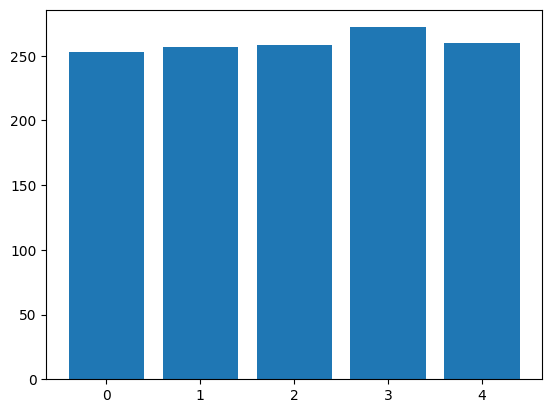

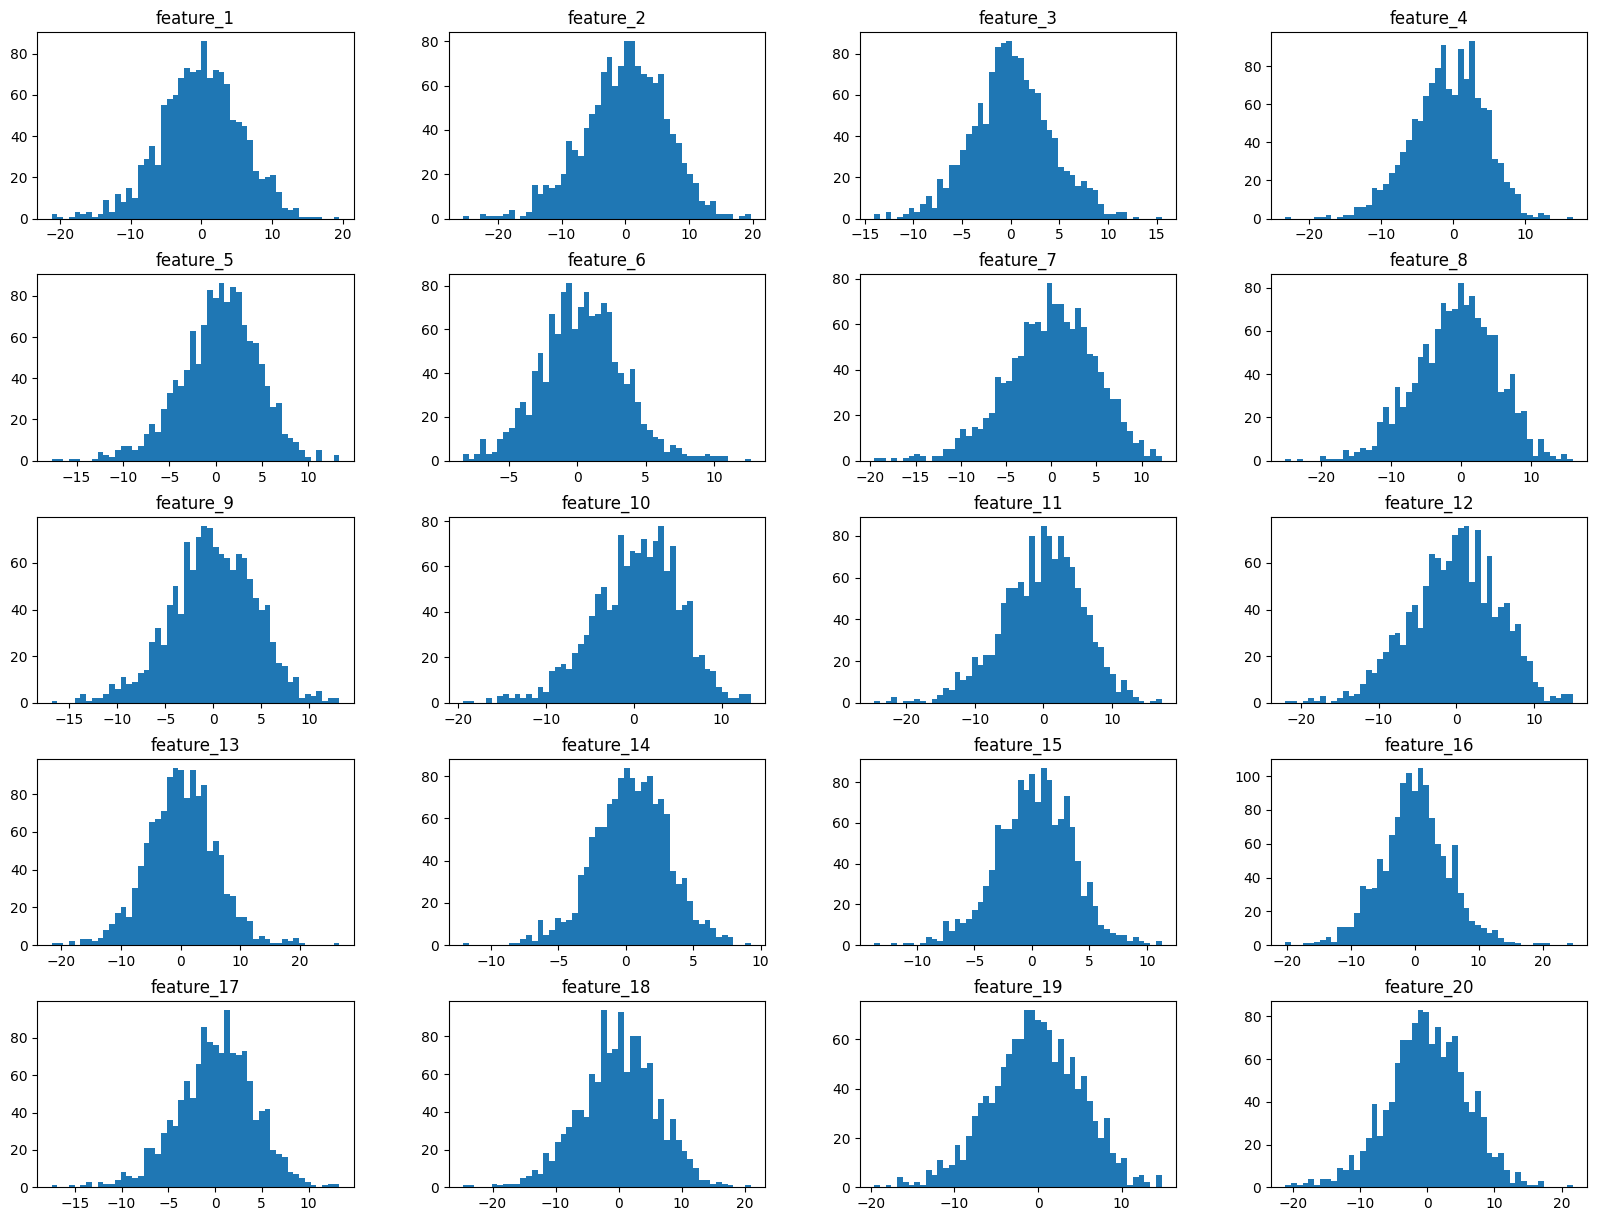

In [39]:
# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

#Plot the distribution of the labels
labels,counts = np.unique(y,return_counts=True)
plt.bar(labels,counts)

# Plot histograms for each numeric feature to understand distributions
X.hist(bins=50, figsize=(20,15),grid = False)
plt.show()

We also plot a correlation matrix to understand the relationship between features in the form of heatmap:

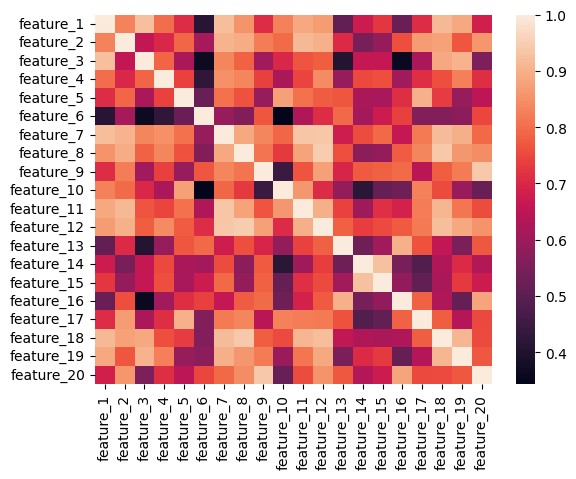

In [40]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix)
plt.show()

# DATA PREPROCESSING

We start by separating features and labels as this is vital in the training phase of building our model, which will learn the relationship between the features and the labels in the training phase. Then, when it will see a new sample, we will be able to input its features into the model, and it will output a prediction for the label.

We first create a new dataframe consisting only of the feature columns, by dropping the 'label' column.

We then create an array consisting only of the labels.

We then proceed by splitting the dataset into training and testing sets. We generally don't want to test our model on the data it was trained on because this can lead to overfitting, where the model performs well on its training data but poorly on new, unseen data.

We can for example do this randomly, by partitioning the data after shuffling it.

The test_size parameter determines the proportion of the original dataset to include in the test split. In this case, we chose to set aside 20% of the data for the test set, and the remaining 80% for training.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then standardize our features so that they have a mean of 0 and a standard deviation of 1, thus reducing the effects of PCA being sensible to difference in the scales of features (it may be overly influenced by the features with a larger scales). Whence, in this way we are ensuring fair representation for all features. 

We therefore first calculate the mean and standard deviation of each feature in the training set and scale the features using these values.

We then apply the same transformation to the test set using the mean and standard deviation calculated from the training set.

We use the training set's parameters to transform the test set so as to simulate real-world conditions: our model will be making predictions on unseen data that may follow the same distribution as the training set. Hence, we need to ensure that the preprocessing stage for the test set matches the preprocessing stage of the training set.


In [42]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_sclaed = pd.DataFrame(scaler.transform(X_test))
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.380282,1.059429,1.563447,1.349716,0.751034,-0.092871,1.358763,1.172096,0.835230,0.847972,1.064965,1.027017,0.095318,0.950757,0.708958,0.096419,0.756102,1.450505,1.361882,0.612726
1,0.499202,0.519601,0.386015,1.111654,1.200075,0.371225,0.774726,0.015795,0.722350,0.703729,0.506712,0.229170,0.217718,1.364489,1.414543,0.328439,0.654251,0.016559,0.469315,0.805429
2,0.714043,0.691577,0.081331,0.263162,-0.146132,0.834931,0.620086,0.121211,1.067473,0.441833,0.774513,0.512717,0.242021,0.367717,1.295272,0.147742,-0.289101,-0.023294,0.857081,0.901781
3,-0.020547,-0.389343,0.007136,-0.076675,0.126184,-0.523440,-0.542413,0.000375,-0.717090,0.379704,-0.113811,-0.500121,0.247033,-0.534504,-0.293143,0.166623,-0.151285,-0.195690,-0.397573,-0.093407
4,-0.344669,1.038678,-0.489372,-0.582532,0.636508,0.602391,0.076546,0.806940,-0.144563,0.575696,0.564668,0.504435,1.342112,-1.255465,-1.351388,0.761449,1.044044,0.713725,-0.272315,0.297815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,-1.332203,-0.677938,-1.448137,-1.212795,-0.225510,-0.617268,-1.227118,-0.957844,-1.012243,-0.448382,-1.043231,-1.096649,-0.331044,-1.340444,-1.389690,-0.585071,-0.441340,-1.206315,-1.197215,-0.647480
1036,-0.480848,-0.690276,-0.690928,-1.011344,-0.585639,-0.586850,-0.731332,-0.494101,-0.819859,-0.264080,-0.655537,-0.502819,-0.202490,-0.707674,-0.702645,-0.300313,-0.873838,-0.556421,-0.876609,-1.049002
1037,-0.211069,0.065943,0.300574,-0.556765,0.610531,0.265785,-0.106856,0.068211,-0.710709,0.539880,0.373968,0.012379,0.327708,-0.472694,-0.838507,-0.590642,0.292321,0.622393,-0.191417,-0.947611
1038,-0.013748,-0.579257,0.625448,0.114155,-0.765814,-0.462228,-0.352206,0.202531,0.384204,-1.096723,-0.501755,-0.284840,-0.641901,0.303426,-0.282305,-0.271393,-0.657765,0.379914,0.555020,0.324779


# PCA

We create a PCA object and fitting it to your training data. The PCA object will find a set of directions (or 'components') in your data that explain the most variance. These components are orthogonal to each other and form a new basis to represent your data. It's a form of feature extraction where your original features are transformed into a new set of features.

plt.plot(np.cumsum(pca.explained_variance_ratio_)) This line is creating a plot of the cumulative explained variance. The explained variance ratio for each component in PCA tells you the proportion of the total variance in your data that is accounted for by that component. When you cumulatively sum these ratios, you get a curve that shows how much total variance of the data is explained as you increase the number of components used.

A steep curve indicates that a lot of variance is explained by a small number of components, and a flattening curve indicates that adding more components doesn't add much explanatory power. By examining this curve, you can make an informed decision about how many components to keep, balancing between data compression (fewer components) and data retention (more components). This is useful when you have a large number of features and you want to reduce dimensionality without losing too much information.

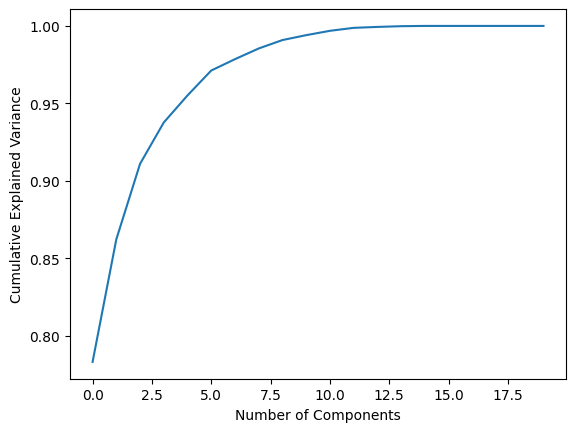

In [43]:
pca = PCA().fit(X_train)

import matplotlib.pyplot as plt
import numpy as np

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [44]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [45]:
print('Number of PCA components: ', pca.n_components_)

Number of PCA components:  5


# Train to Logistic Regression

We write a function called test_model which enables us to quickly train that model, make predictions, and get an evaluation of the model's performance:

In [46]:
def test_model(model, X_train = X_train, X_test = X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print the accuracy of the prediction
    print('Test accuracy: %.3f' % accuracy_score(y_test, y_pred))

    plt.imshow(confusion_matrix(y_test, y_pred),cmap='Greys')
    plt.colorbar()
    plt.show()
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Test accuracy: 0.481


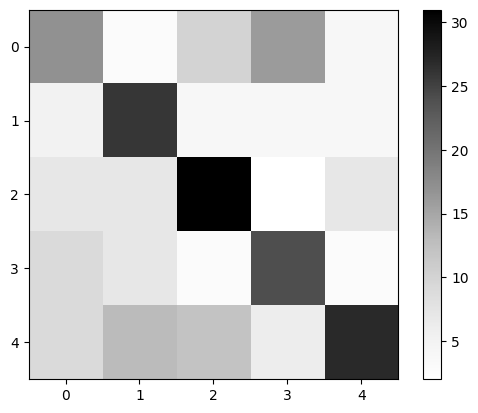

              precision    recall  f1-score   support

           0       0.36      0.34      0.35        50
           1       0.46      0.60      0.53        43
           2       0.52      0.57      0.54        54
           3       0.46      0.52      0.49        46
           4       0.60      0.40      0.48        67

    accuracy                           0.48       260
   macro avg       0.48      0.49      0.48       260
weighted avg       0.49      0.48      0.48       260



In [47]:
model = LogisticRegression(random_state=42)
test_model(model)

We can see that standardization makes accuracy worse:

Test accuracy: 0.469


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



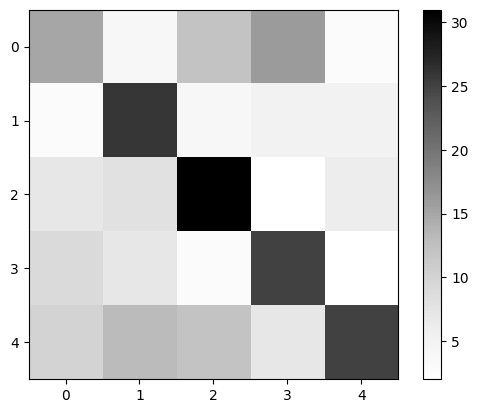

              precision    recall  f1-score   support

           0       0.34      0.30      0.32        50
           1       0.45      0.60      0.51        43
           2       0.50      0.57      0.53        54
           3       0.45      0.54      0.50        46
           4       0.61      0.37      0.46        67

    accuracy                           0.47       260
   macro avg       0.47      0.48      0.47       260
weighted avg       0.48      0.47      0.46       260



In [48]:
model = LogisticRegression(random_state=42)
test_model(model, X_train_scaled, X_test_sclaed)

Test accuracy: 0.462


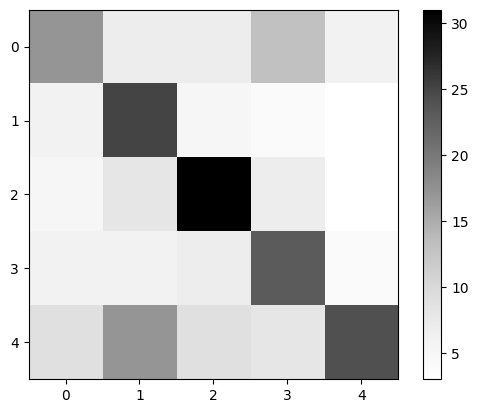

              precision    recall  f1-score   support

           0       0.40      0.34      0.37        50
           1       0.40      0.58      0.47        43
           2       0.53      0.57      0.55        54
           3       0.42      0.50      0.46        46
           4       0.60      0.36      0.45        67

    accuracy                           0.46       260
   macro avg       0.47      0.47      0.46       260
weighted avg       0.48      0.46      0.46       260



In [49]:
model_pca = LogisticRegression(random_state=42)
test_model(model_pca, X_train_pca, X_test_pca)

In this case, applying PCA does not appear to enhance the performance of our logistic regression model; in fact, we observe a decrease in test accuracy. It's important to bear in mind that PCA's value is more pronounced in high-dimensional datasets where reducing computational complexity and mitigating the curse of dimensionality become crucial. If one were to proceed with PCA under such circumstances, a reasonable selection would be to retain around 5 principal components, considering the cumulative explained variance. It's a careful balance between data simplification and maintaining adequate predictive power, making it dependent on the specific context and problem constraints.

# Hyper parameter tuning

In [50]:
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear'],
        'max_iter': [15000]
    },
    {
        'penalty': ['l2'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'max_iter': [15000]
    },
    {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['saga'],
        'max_iter': [15000]
    }
]

clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

print("Best Parameters: \n", best_clf.best_params_)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best Parameters: 
 {'C': 0.08858667904100823, 'max_iter': 15000, 'penalty': 'l2', 'solver': 'sag'}


We can look at the results of this tuning:

In [51]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005120,0.000594,0.003023,0.000520,0.0001,15000,l1,liblinear,"{'C': 0.0001, 'max_iter': 15000, 'penalty': 'l...",0.197115,0.197115,0.192308,0.192308,0.197115,0.195192,0.002355,138
1,0.011815,0.001023,0.003550,0.000211,0.0001,15000,l2,liblinear,"{'C': 0.0001, 'max_iter': 15000, 'penalty': 'l...",0.403846,0.427885,0.471154,0.370192,0.475962,0.429808,0.040178,126
2,0.005990,0.000803,0.002874,0.000550,0.000264,15000,l1,liblinear,"{'C': 0.00026366508987303583, 'max_iter': 1500...",0.197115,0.197115,0.192308,0.192308,0.197115,0.195192,0.002355,138
3,0.012513,0.000887,0.002823,0.000406,0.000264,15000,l2,liblinear,"{'C': 0.00026366508987303583, 'max_iter': 1500...",0.437500,0.456731,0.466346,0.408654,0.504808,0.454808,0.031833,118
4,0.006257,0.000786,0.003498,0.001325,0.000695,15000,l1,liblinear,"{'C': 0.0006951927961775605, 'max_iter': 15000...",0.197115,0.197115,0.192308,0.192308,0.197115,0.195192,0.002355,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.893100,0.200463,0.004757,0.001229,1438.449888,15000,l2,saga,"{'C': 1438.44988828766, 'max_iter': 15000, 'pe...",0.495192,0.485577,0.461538,0.485577,0.490385,0.483654,0.011618,39
136,2.565074,0.259963,0.004047,0.000156,3792.690191,15000,l1,saga,"{'C': 3792.690190732246, 'max_iter': 15000, 'p...",0.495192,0.485577,0.461538,0.485577,0.490385,0.483654,0.011618,39
137,1.890472,0.202279,0.004722,0.000882,3792.690191,15000,l2,saga,"{'C': 3792.690190732246, 'max_iter': 15000, 'p...",0.495192,0.485577,0.461538,0.485577,0.490385,0.483654,0.011618,39
138,2.550642,0.234927,0.004162,0.001220,10000.0,15000,l1,saga,"{'C': 10000.0, 'max_iter': 15000, 'penalty': '...",0.495192,0.485577,0.461538,0.485577,0.490385,0.483654,0.011618,39


We now proceed with sorting and plotting the mean test scores from hyperparameter tuning. The plot will have as x-axis the parameter settings (params) that achieved these scores, and on the y-axis are scores themselves (mean_test_score).

We also perform a rotation of the x-axis labels by 90 degrees so as to prevent the labels from overlapping and becoming unreadable if they are long.

Through this visualization we are able to understand which hyperparameters led to the best performance during hyperparameter tuning. 

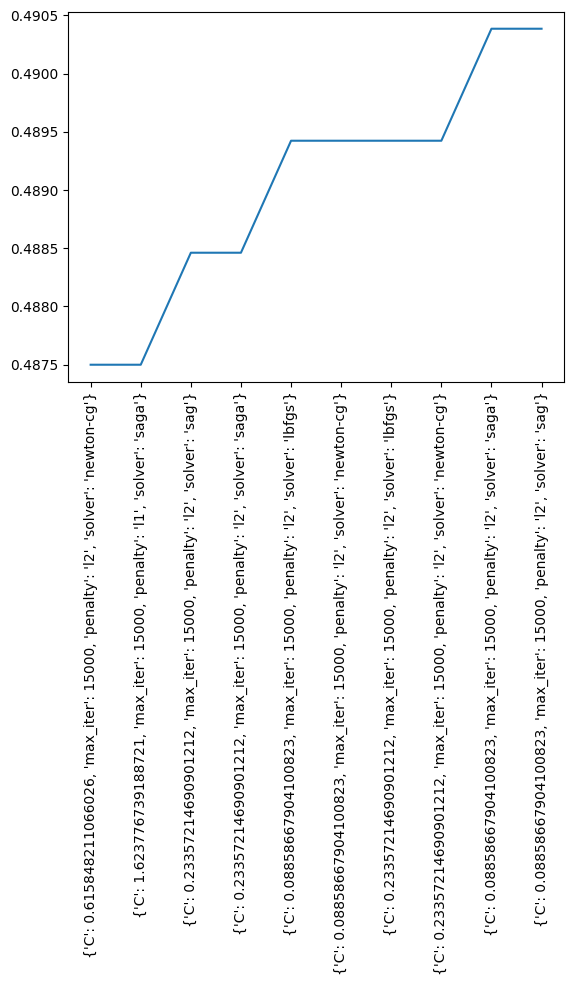

In [52]:
results = results.sort_values(by='mean_test_score')
last_n = 10
plt.plot(results['params'][-last_n:].astype(str), results['mean_test_score'][-last_n:])
plt.xticks(rotation = 90);

By examining the plot, it's noticeable that the majority of the top-performing models were optimized using all the solvers except 'liblinear'. This demonstrates that, in this particular case, 'liblinear' might not be the most effective solver for the Logistic Regression model.

In terms of regularization or 'penalty' parameters, the 'l1' penalty only appears in the tenth position among the top-performing models. In contrast, the 'l2' penalty is present in all other high-ranking combinations. This suggests that 'l2' regularization generally performs better with our data, although the effectiveness of 'l1' or 'l2' may vary depending on the specific problem and data characteristics.

Thus, the plot provides valuable insights to fine-tune our model by suggesting the most effective solvers and regularization strategies for our specific dataset.

In [53]:
import plotly.express as px
from sklearn.decomposition import PCA

# Since PCA chose 6 components to explain 95% variance
n_components = 6
pca = PCA(n_components=n_components)

# Exclude 'Unnamed: 0' and 'label' columns for PCA
features = df.drop(columns=['label'])
components = pca.fit_transform(features)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'label'

fig = px.scatter_matrix(
    components,
    color=df["label"],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Other models

In this section we will explore application of different machine learning models to the data and evaluation of their performance, in order to identify the best model for the given dataset. For each model, the test_model function is called to train the model on the training data, make predictions on the test data, and evaluate the model's performance. This way, we can directly compare the performance of different models and choose the one that performs best on our specific dataset.

## KNN

KNN is an instance-based learning algorithm that classifies a new instance based on its similarity to existing instances in the data. We set n_jobs=-1 to use all processors for parallel computation, which can speed up the training process when dealing with large datasets.

Test accuracy: 0.523


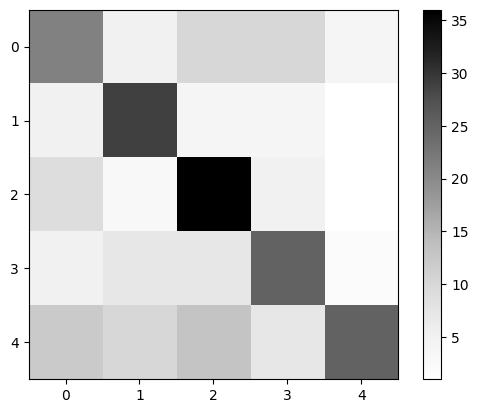

              precision    recall  f1-score   support

           0       0.40      0.42      0.41        50
           1       0.54      0.67      0.60        43
           2       0.51      0.67      0.58        54
           3       0.49      0.54      0.52        46
           4       0.76      0.37      0.50        67

    accuracy                           0.52       260
   macro avg       0.54      0.54      0.52       260
weighted avg       0.56      0.52      0.52       260



In [54]:
KNN = KNeighborsClassifier(n_jobs=-1)
test_model(KNN)

## SVC

We then try to apply SVC, a type of Support Vector Machine (SVM), which is a powerful and versatile class of machine learning algorithms that is often used for classification tasks. The random_state parameter is set to ensure that the results are reproducible.

Test accuracy: 0.546


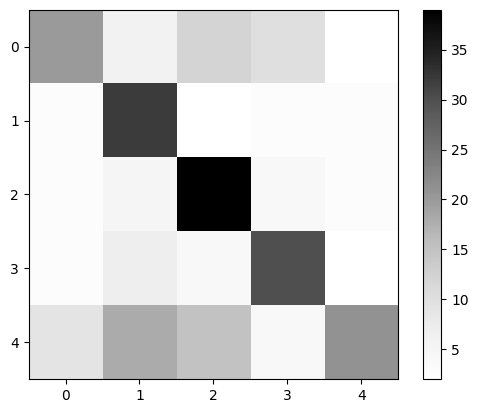

              precision    recall  f1-score   support

           0       0.53      0.40      0.45        50
           1       0.47      0.74      0.58        43
           2       0.54      0.72      0.62        54
           3       0.59      0.65      0.62        46
           4       0.68      0.31      0.43        67

    accuracy                           0.55       260
   macro avg       0.56      0.57      0.54       260
weighted avg       0.57      0.55      0.53       260



In [55]:
svc = SVC(random_state=42)
test_model(svc)

## Random Forest

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

Test accuracy: 0.550


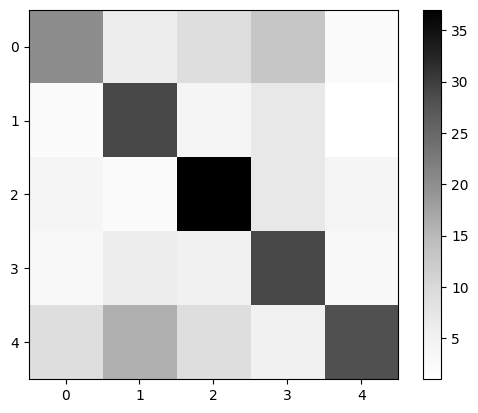

              precision    recall  f1-score   support

           0       0.53      0.40      0.45        50
           1       0.49      0.67      0.57        43
           2       0.58      0.69      0.63        54
           3       0.48      0.63      0.54        46
           4       0.74      0.42      0.53        67

    accuracy                           0.55       260
   macro avg       0.56      0.56      0.55       260
weighted avg       0.58      0.55      0.55       260



In [56]:
forest = RandomForestClassifier(random_state=42)
test_model(forest)

## MLP

We finally apply a Multi-Layer Perceptron (MLP) classifier to the data. MLP is a type of neural network that can learn complex patterns and perform non-linear classification. The hidden_layer_sizes=(100,1000,100) argument defines the number of neurons in the hidden layers, and random_state ensures reproducibility.

Test accuracy: 0.665


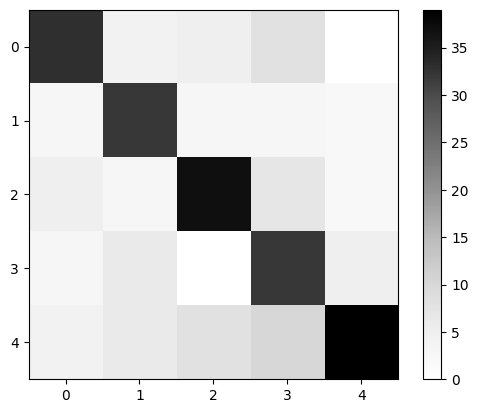

              precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.63      0.74      0.68        43
           2       0.70      0.69      0.69        54
           3       0.53      0.70      0.60        46
           4       0.81      0.58      0.68        67

    accuracy                           0.67       260
   macro avg       0.67      0.67      0.67       260
weighted avg       0.68      0.67      0.67       260



In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(100,1000,100),random_state=42)
test_model(mlp)

# Training and testing features

In [62]:
# read new dataset 'mldata_0003165871.TEST_FEATURES.csv as X_test dropping column 'id'
X_test = pd.read_csv('mldata_0003165871.TEST_FEATURES.csv')
X_test = X_test.drop(columns=['id'])
X_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,2.530733,2.241161,3.553953,4.658750,0.575254,0.940930,3.217537,7.266227,1.191694,0.616243,1.570118,5.059567,5.862239,-0.959445,-0.717478,3.063031,2.678234,5.736732,6.706712,4.204905
1,4.568226,4.083957,3.733518,6.339930,2.777915,2.829862,3.481718,4.390050,5.685672,1.217179,2.473651,4.264733,3.025347,3.997584,4.274236,5.450826,1.948675,3.822809,5.526517,8.206703
2,1.505553,3.070979,-1.178526,-0.844521,-2.215127,-2.414521,0.722682,-5.617095,-0.567455,2.420798,-0.020838,-5.026516,-10.470959,-1.797252,0.292240,-5.591315,-0.796637,-5.084223,-0.467233,0.727331
3,2.742855,-0.351038,1.592670,-1.388278,-2.605358,-0.897971,0.058811,-1.315370,-0.572544,-0.551357,-2.230029,0.598076,-4.271780,0.380435,0.324579,-3.762995,-1.700051,-0.266866,2.332353,0.379029
4,6.381600,11.561999,4.898265,-0.644191,4.331784,1.682094,5.217111,6.782949,4.372099,6.849860,6.679896,4.006824,1.826346,-0.584058,-1.643283,2.941714,6.117358,10.410513,6.459780,7.826015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,-0.454680,4.281551,-0.271379,-1.872848,3.418851,2.475488,3.573470,0.816521,1.930440,2.364390,3.810166,1.480040,4.126640,0.400885,-0.057981,3.698640,5.540837,3.328810,0.414339,3.348226
1296,4.929701,4.779388,4.377385,5.270822,2.509095,3.307265,7.250868,5.872506,7.377352,-0.723146,2.513946,8.899014,5.250061,5.544422,4.539750,3.910999,2.189619,7.406560,8.292741,5.643569
1297,-2.637271,-3.628903,-4.180283,-0.730612,1.757711,0.229861,-1.972530,-4.986450,-1.720052,2.298376,-0.644801,-4.064804,3.701552,0.255264,3.084989,2.731270,-1.200417,-7.834179,-5.350430,-0.717106
1298,3.253524,-2.779836,0.927723,-0.287456,-1.688387,-0.569985,-0.367889,-5.191463,-0.178969,2.572209,1.533126,-3.923618,-5.964941,1.656873,4.405182,-2.444619,-4.455107,-3.849083,-1.718319,-3.687512


In [67]:
# train mlp on initial dataset without doing test train split
mlp = MLPClassifier(hidden_layer_sizes=(100,1000,100),random_state=42)
mlp.fit(X,y)
# treat this X as X_train and this new dataset as X_test
y_pred = mlp.predict(X_test)
y_pred

#predict labels and save them in a new csv file
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('mldata_0003165871.TEST_LABELS.csv')

In [92]:
# read the labels csv file
y_pred = pd.read_csv('mldata_0003165871.TEST_LABELS.csv')
y_pred

,Unnamed: 0,0
0,0,4
1,1,4
2,2,1
3,3,3
4,4,3
...,...,...
1295,1295,4
1296,1296,0
1297,1297,0
1298,1298,1


<BarContainer object of 5 artists>

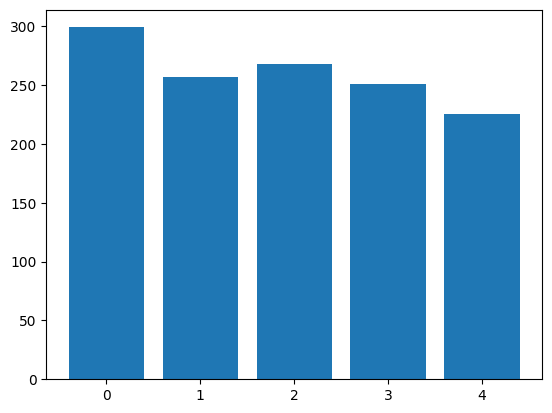

In [86]:
# plot the distribution of the labels
labels,counts = np.unique(y_pred,return_counts=True)
plt.bar(labels,counts)

In [97]:
# Select the third column of y_pred only
third_column = y_pred.iloc[:, 1]


# Write to a text file without a header
third_column.to_csv('output.txt', header=False, index=False)

In [98]:
#print the output.txt file
with open('output.txt') as f:
    print(f.read())


4
4
1
3
3
4
3
0
3
3
3
1
1
1
1
0
0
4
0
4
1
1
1
1
0
2
2
1
4
4
4
2
2
3
4
0
4
0
4
2
3
0
2
3
0
0
0
0
1
1
3
4
1
0
3
1
2
4
2
4
3
1
3
4
3
4
3
2
0
1
0
0
2
2
2
1
4
1
1
0
0
4
4
2
3
0
4
0
1
2
4
2
1
0
0
2
1
4
4
2
2
2
2
1
3
3
0
1
0
4
3
0
2
3
0
3
4
1
1
2
3
2
4
2
4
0
1
1
3
3
4
2
3
3
1
0
2
4
0
2
2
4
1
1
2
2
0
3
4
1
3
2
4
4
0
4
2
1
4
4
4
3
3
4
0
1
0
4
4
0
0
3
3
2
1
1
1
0
4
4
4
0
3
4
1
0
3
1
4
3
0
4
3
4
1
3
1
3
1
1
0
2
3
4
1
4
1
2
0
2
2
3
2
0
3
0
0
2
1
0
1
2
2
3
1
3
0
2
0
0
1
4
4
0
3
2
3
1
0
2
3
4
2
2
3
2
2
1
0
3
2
3
4
4
4
2
3
0
3
4
0
1
0
0
1
0
1
1
4
2
2
0
1
4
1
1
1
0
0
1
1
0
0
3
0
1
0
2
1
2
1
4
3
2
3
2
0
2
1
0
4
0
2
2
2
3
3
2
2
3
3
2
1
3
2
0
2
2
2
0
2
2
4
3
2
0
4
3
4
3
0
0
1
3
2
1
0
4
0
4
3
2
2
0
4
2
2
1
1
0
2
4
3
0
4
2
1
3
1
3
3
0
0
1
0
0
3
1
3
4
0
3
1
2
1
2
0
0
2
4
3
3
1
0
3
0
4
3
2
4
0
4
2
3
1
3
1
3
1
0
2
4
2
3
0
3
0
2
4
0
1
0
0
3
0
4
0
3
4
3
0
3
3
4
0
2
0
4
0
2
2
1
2
1
2
3
1
1
4
3
0
4
1
2
2
4
4
1
0
3
3
2
0
2
0
2
3
0
0
4
4
1
4
3
2
0
3
0
0
0
4
4
3
2
3
2
4
3
1
1
3
3
3
0
2
1
1
0
0
1
1
1
2
3
0
0
0
3
1
2
